## Week 2

### Cats and dogs dataset - overfitting

In [3]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
#     -O /tmp/horse-or-human.zip
import sys
import os
!{sys.executable} -m wget -o {os.getcwd()}/tmp/cats_and_dogs_filtered.zip https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

100% [....................................................] 68606236 / 68606236
Saved under /Users/wenbinliu/TensorFlow_Certificate_Course/tmp/cats_and_dogs_filtered.zip


In [5]:
import os
import zipfile

local_zip = str(os.getcwd()) + '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(str(os.getcwd()) + '/tmp/cats_and_dogs_filtered')
zip_ref.close()

In [17]:
base_dir = str(os.getcwd()) + '/tmp/cats_and_dogs_filtered/cats_and_dogs_filtered'
train_data_dir = os.path.join(base_dir, "train")
validate_data_dir = os.path.join(base_dir, "validation")

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(lr=1e-4), loss="binary_crossentropy",metrics=["accuracy"])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Without augumentation
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [27]:
train_generator = train_data_gen.flow_from_directory(train_data_dir, target_size=(150,150), batch_size=20, class_mode="binary")
valid_generator = valid_data_gen.flow_from_directory(validate_data_dir, target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs = 50, validation_data = valid_generator, validation_steps = 50, verbose = 2)

Epoch 1/50
100/100 - 111s - loss: 0.6888 - accuracy: 0.5375 - val_loss: 0.6780 - val_accuracy: 0.5260
Epoch 2/50
100/100 - 127s - loss: 0.6590 - accuracy: 0.6200 - val_loss: 0.6385 - val_accuracy: 0.6380
Epoch 3/50
100/100 - 115s - loss: 0.6189 - accuracy: 0.6565 - val_loss: 0.5960 - val_accuracy: 0.6900
Epoch 4/50
100/100 - 149s - loss: 0.5663 - accuracy: 0.7060 - val_loss: 0.5937 - val_accuracy: 0.6710
Epoch 5/50
100/100 - 125s - loss: 0.5297 - accuracy: 0.7335 - val_loss: 0.6557 - val_accuracy: 0.6440
Epoch 6/50
100/100 - 110s - loss: 0.5014 - accuracy: 0.7475 - val_loss: 0.5409 - val_accuracy: 0.7280
Epoch 7/50
100/100 - 111s - loss: 0.4666 - accuracy: 0.7895 - val_loss: 0.5534 - val_accuracy: 0.7140
Epoch 8/50
100/100 - 109s - loss: 0.4422 - accuracy: 0.7880 - val_loss: 0.5223 - val_accuracy: 0.7460
Epoch 9/50
100/100 - 110s - loss: 0.4166 - accuracy: 0.8045 - val_loss: 0.5574 - val_accuracy: 0.7260
Epoch 10/50
100/100 - 111s - loss: 0.3862 - accuracy: 0.8215 - val_loss: 0.5790 - 

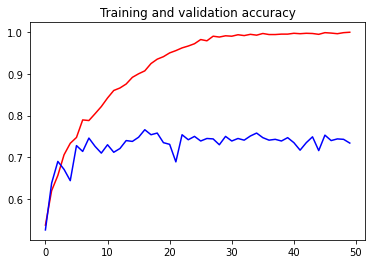

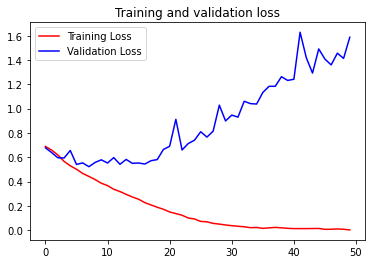

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Without augumentation
train_data_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
valid_data_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [31]:
train_generator = train_data_gen.flow_from_directory(train_data_dir, target_size=(150,150), batch_size=20, class_mode="binary")
valid_generator = valid_data_gen.flow_from_directory(validate_data_dir, target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history2 = model.fit(train_generator, steps_per_epoch = 100, epochs = 50, validation_data = valid_generator, validation_steps = 50, verbose = 2)

Epoch 1/50
100/100 - 91s - loss: 0.9538 - accuracy: 0.6635 - val_loss: 0.6295 - val_accuracy: 0.6580
Epoch 2/50
100/100 - 87s - loss: 0.5945 - accuracy: 0.6865 - val_loss: 0.6177 - val_accuracy: 0.6760
Epoch 3/50
100/100 - 85s - loss: 0.5732 - accuracy: 0.6985 - val_loss: 0.6340 - val_accuracy: 0.6700
Epoch 4/50
100/100 - 84s - loss: 0.5482 - accuracy: 0.7240 - val_loss: 0.5916 - val_accuracy: 0.7070
Epoch 5/50
100/100 - 82s - loss: 0.5549 - accuracy: 0.7125 - val_loss: 0.5905 - val_accuracy: 0.6880
Epoch 6/50
100/100 - 81s - loss: 0.5444 - accuracy: 0.7350 - val_loss: 0.5529 - val_accuracy: 0.7130
Epoch 7/50
100/100 - 80s - loss: 0.5553 - accuracy: 0.7185 - val_loss: 0.5426 - val_accuracy: 0.7270
Epoch 8/50
100/100 - 80s - loss: 0.5400 - accuracy: 0.7325 - val_loss: 0.5417 - val_accuracy: 0.7240
Epoch 9/50
100/100 - 2394s - loss: 0.5447 - accuracy: 0.7220 - val_loss: 0.5473 - val_accuracy: 0.7050
Epoch 10/50
100/100 - 4713s - loss: 0.5314 - accuracy: 0.7360 - val_loss: 0.5606 - val_ac

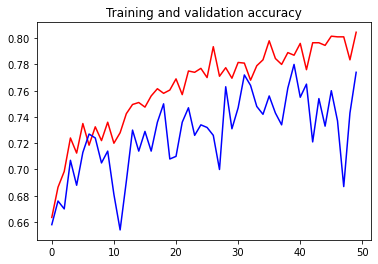

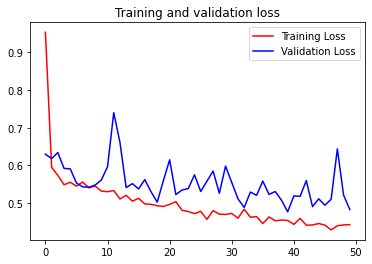

In [33]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()